                                                  X0              X1     X2  \
0                                Coloring book moana  ART_AND_DESIGN    967   
1  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN  87510   
2              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN    967   
3                         Paper flowers instructions  ART_AND_DESIGN    167   
4            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN    178   

     X3          X4    X5 X6        X7                         X8  \
0   14M    500,000+  Free  0  Everyone  Art & Design;Pretend Play   
1  8.7M  5,000,000+  Free  0  Everyone               Art & Design   
2  2.8M    100,000+  Free  0  Everyone    Art & Design;Creativity   
3  5.6M     50,000+  Free  0  Everyone               Art & Design   
4   19M     50,000+  Free  0  Everyone               Art & Design   

                 X9    X10           X11    Y  
0  January 15, 2018  2.0.0  4.0.3 and up  3.9  
1    August 1,

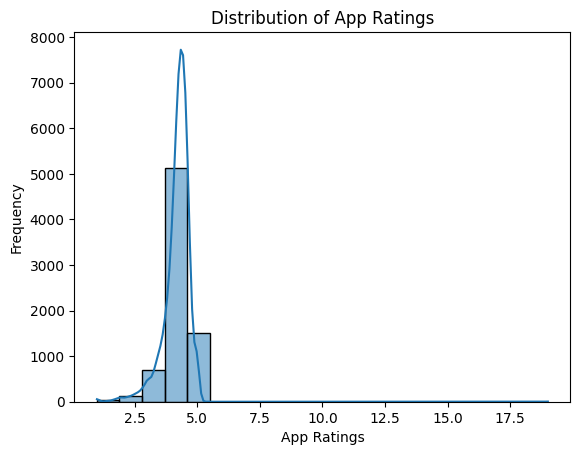

No numeric columns found. Attempting to convert non-numeric columns to numeric where possible.
Columns in X after preprocessing: Index(['X2', 'X10', 'X1_AUTO_AND_VEHICLES', 'X1_BEAUTY',
       'X1_BOOKS_AND_REFERENCE', 'X1_BUSINESS', 'X1_COMICS',
       'X1_COMMUNICATION', 'X1_DATING', 'X1_EDUCATION', 'X1_ENTERTAINMENT',
       'X1_EVENTS', 'X1_FAMILY', 'X1_FINANCE', 'X1_FOOD_AND_DRINK', 'X1_GAME',
       'X1_HEALTH_AND_FITNESS', 'X1_HOUSE_AND_HOME', 'X1_LIBRARIES_AND_DEMO',
       'X1_LIFESTYLE', 'X1_MAPS_AND_NAVIGATION', 'X1_MEDICAL',
       'X1_NEWS_AND_MAGAZINES', 'X1_PARENTING', 'X1_PERSONALIZATION',
       'X1_PHOTOGRAPHY', 'X1_PRODUCTIVITY', 'X1_SHOPPING', 'X1_SOCIAL',
       'X1_SPORTS', 'X1_TOOLS', 'X1_TRAVEL_AND_LOCAL', 'X1_VIDEO_PLAYERS',
       'X1_WEATHER', 'X6_$1.00', 'X6_$1.20', 'X6_$1.29', 'X6_$1.49',
       'X6_$1.50', 'X6_$1.59', 'X6_$1.61', 'X6_$1.70', 'X6_$1.75', 'X6_$1.76',
       'X6_$1.99', 'X6_$10.00', 'X6_$10.99', 'X6_$11.99', 'X6_$12.99',
       'X6_$13.99', '

c:\Users\Tech Trick\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.61799e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Lasso Regression - MAE: 0.3559984011804718, MSE: 0.25490520327390226, R2: 0.002290484969358464
ElasticNet - MAE: 0.35601920708672236, MSE: 0.25491096055968915, R2: 0.002267950714519573
Support Vector Regression - MAE: 0.3341663137363631, MSE: 0.24668278140765107, R2: 0.03447338444410886
Adding missing column X6_$3.88 to test_data with default value 0.
Adding missing column X6_$3.02 to test_data with default value 0.
Adding missing column X6_$14.00 to test_data with default value 0.
Adding missing column X6_$389.99 to test_data with default value 0.
Adding missing column X6_$2.50 to test_data with default value 0.
Adding missing column X6_$10.99 to test_data with default value 0.
Adding missing column X6_$8.49 to test_data with default value 0.
Adding missing column X6_$1.61 to test_data with default value 0.
Adding missing column X6_$19.40 to test_data with default value 0.
Adding missing column X6_$2.56 to test_data with default value 0.
Adding missing column X6_$9.00 to test_data wit

In [14]:
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from lightgbm import LGBMRegressor


# Load datasets
train_data = pd.read_csv('d:/asu/Semester 6 - Spring 23/CSE472 - Artificial Intelligence/project/train.csv')
test_data = pd.read_csv('d:/asu/Semester 6 - Spring 23/CSE472 - Artificial Intelligence/project/test.csv')

# Initial exploration
print(train_data.head())
print(train_data.info())
print(train_data.describe())

# Visualize app ratings distribution
sns.histplot(train_data['Y'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('App Ratings')
plt.ylabel('Frequency')
plt.show()

# Data preprocessing (example)
# Handle missing values
train_data.dropna(inplace=True)

# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['X1', 'X6'], drop_first=True)

# Feature selection
X = train_data.drop(['Y'], axis=1)
y = train_data['Y']

# Ensure all features are numeric
if X.select_dtypes(include=[np.number]).empty:
    print("No numeric columns found. Attempting to convert non-numeric columns to numeric where possible.")
    for col in X.columns:
        # Convert columns to numeric if possible, otherwise fill with NaN
        X[col] = pd.to_numeric(X[col], errors='coerce')
    # Drop columns that are still non-numeric
    X = X.dropna(axis=1, how='all')

if X.empty:
    raise ValueError("No numeric columns found in the dataset after preprocessing, even after attempting conversion. Please check the preprocessing steps.")

# Debugging: Print the columns of X to verify
print("Columns in X after preprocessing:", X.columns)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in X_train and X_val using SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean of each column
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

# Model development
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': LassoCV(),
    'ElasticNet': ElasticNet(),
    'Support Vector Regression': SVR()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{name} - MAE: {mean_absolute_error(y_val, y_pred)}, MSE: {mean_squared_error(y_val, y_pred)}, R2: {r2_score(y_val, y_pred)}")

best_model = models['Lasso Regression']  

# Preprocess the test dataset (apply the same preprocessing steps as the training data)
# Check if the columns 'X1' and 'X6' exist in the test_data before applying pd.get_dummies
columns_to_encode = ['X1', 'X6']
existing_columns = [col for col in columns_to_encode if col in test_data.columns]
if existing_columns:
    test_data = pd.get_dummies(test_data, columns=existing_columns, drop_first=True)
else:
    print(f"Columns {columns_to_encode} not found in test_data. Skipping dummy encoding.")

# Ensure the test dataset has the same columns as the training dataset
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    print(f"Adding missing column {col} to test_data with default value 0.")
    if col in train_data.columns:
        # Use the mean value from the training dataset if available
        test_data[col] = train_data[col].mean()
    else:
        # Otherwise, use a default value of 0
        test_data[col] = 0

# Ensure the test dataset does not have extra columns
extra_cols = set(test_data.columns) - set(X_train.columns)
if extra_cols:
    print(f"Extra columns in test_data that are not in X_train: {extra_cols}")
    test_data = test_data.drop(columns=extra_cols)

# Reorder columns to match the training data
test_data = test_data[X_train.columns]

# Ensure all columns in test_data match the order of X_train
test_data = test_data[X_train.columns]

# Ensure the test dataset does not have extra columns
extra_cols = set(test_data.columns) - set(X_train.columns)
if extra_cols:
    print(f"Extra columns in test_data that are not in X_train: {extra_cols}")
    test_data = test_data.drop(columns=extra_cols)
# Ensure all columns in test_data match the order of X_train
try:
    test_data = test_data[X_train.columns]
except KeyError as e:
    raise ValueError(f"KeyError: {e}. Ensure that all columns in X_train are present in test_data.")
test_data = test_data[X_train.columns]

# Debugging: Check if all columns match
missing_after_reorder = set(X_train.columns) - set(test_data.columns)
if missing_after_reorder:
    raise ValueError(f"Columns still missing after reordering: {missing_after_reorder}")

# Ensure all columns in test_data match the order of X_train
test_data = test_data[X_train.columns]

# Debugging: Check if all columns match
missing_after_reorder = set(X_train.columns) - set(test_data.columns)
if missing_after_reorder:
    raise ValueError(f"Columns still missing after reordering: {missing_after_reorder}")

# Ensure all columns in test_data match the order of X_train
test_data = test_data[X_train.columns]

# Debugging: Check if all columns match
missing_after_reorder = set(X_train.columns) - set(test_data.columns)
if missing_after_reorder:
    raise ValueError(f"Columns still missing after reordering: {missing_after_reorder}")

# Drop extra columns in test_data that are not in X_train
extra_cols = set(test_data.columns) - set(X_train.columns)
if extra_cols:
    print(f"Extra columns in test_data that are not in X_train: {extra_cols}")
    test_data = test_data.drop(columns=extra_cols)

# Reorder columns to match the training data
test_data = test_data[X_train.columns]

# Debugging: Check if all columns match
missing_after_reorder = set(X_train.columns) - set(test_data.columns)
if missing_after_reorder:
    raise ValueError(f"Columns still missing after reordering: {missing_after_reorder}")

# Ensure all columns in test_data match the order of X_train
test_data = test_data[X_train.columns]

# Drop extra columns in test_data that are not in X_train
extra_cols = set(test_data.columns) - set(X_train.columns)
if extra_cols:
    print(f"Extra columns in test_data that are not in X_train: {extra_cols}")
    test_data = test_data.drop(columns=extra_cols)

test_data = test_data[X_train.columns]  # Reorder columns to match training data

# Ensure all features in test_data are numeric
if test_data.select_dtypes(include=[np.number]).empty:
    print("No numeric columns found in test_data. Attempting to convert non-numeric columns to numeric where possible.")
    for col in test_data.columns:
        # Convert columns to numeric if possible, otherwise fill with NaN
        test_data[col] = pd.to_numeric(test_data[col], errors='coerce')
    # Drop columns that are still non-numeric
    test_data = test_data.dropna(axis=1, how='all')

if test_data.empty:
    raise ValueError("No numeric columns found in test_data after preprocessing, even after attempting conversion. Please check the preprocessing steps.")

# Ensure all columns in test_data are numeric
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        try:
            # Attempt to convert to numeric
            test_data[col] = pd.to_numeric(test_data[col], errors='coerce')
        except Exception as e:
            print(f"Error converting column {col} to numeric: {e}")

# Drop columns that are still non-numeric or have NaN values after conversion
test_data = test_data.dropna(axis=1, how='any')



# Generate predictions for the test dataset

try:
    test_predictions = best_model.predict(test_data)
except ValueError as e:
    print(f"ValueError encountered: {e}")
    # Align test_data columns with the model's expected features
    missing_cols = set(X_train.columns) - set(test_data.columns)
    for col in missing_cols:
        print(f"Adding missing column {col} to test_data with default value 0.")
        test_data[col] = 0

    extra_cols = set(test_data.columns) - set(X_train.columns)
    if extra_cols:
        print(f"Extra columns in test_data that are not in X_train: {extra_cols}")
        test_data = test_data.drop(columns=extra_cols)

    # Reorder columns to match the training data
    test_data = test_data[X_train.columns]

    # Retry prediction
    test_predictions = best_model.predict(test_data)

# Save predictions to SampleSubmission.csv
submission = pd.read_csv('d:/asu/Semester 6 - Spring 23/CSE472 - Artificial Intelligence/project/SampleSubmission.csv')
submission['Y'] = test_predictions
submission.to_csv('d:/asu/Semester 6 - Spring 23/CSE472 - Artificial Intelligence/project/SampleSubmission.csv', index=False)

print("Predictions have been saved to SampleSubmission.csv")
  